In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

2023-11-22 03:35:46.869316: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-22 03:35:46.935430: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-22 03:35:46.936502: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-22 03:35:48.084040: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


# Preparing The Data

In [3]:
img_height,img_width=180,180
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  "train",
  label_mode="categorical",
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 8922 files belonging to 23 classes.
Using 7138 files for training.


2023-11-22 03:37:54.858265: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [4]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  "valid",
  label_mode="categorical",
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 853 files belonging to 23 classes.
Using 170 files for validation.


In [5]:
class_names = train_ds.class_names
print(class_names)

['abdominal-machine', 'arm-curl', 'arm-extension', 'back-extension', 'back-row-machine', 'bench-press', 'cable-lat-pulldown', 'chest-fly', 'chest-press', 'dip-chin-assist', 'hip-abduction-adduction', 'incline-bench', 'lat-pulldown', 'leg-extension', 'leg-press', 'lying-down-leg-curl', 'overhead-shoulder-press', 'pulley-machine', 'seated-cable-row', 'seated-leg-curl', 'smith-machine', 'squat-rack', 'torso-rotation-machine']


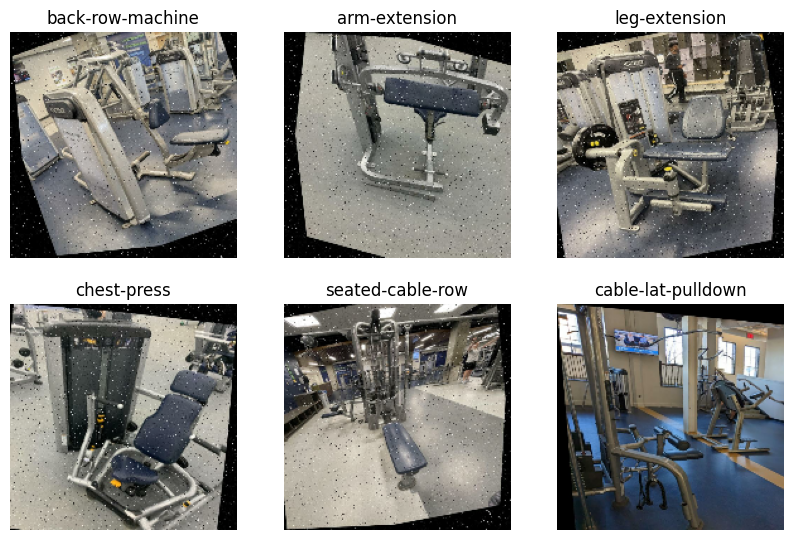

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(6):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))

    # Convert one-hot encoded label to integer
    label_int = np.argmax(labels[i])
    plt.title(class_names[label_int])
    plt.axis("off")

# Training The Model


In [10]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(180,180,3),
                   classes=5,
                   weights='imagenet')


for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(23, activation='softmax'))

In [11]:
resnet_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [12]:
epochs=10
history = resnet_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
) v 

Epoch 1/10


224/224 [==============================] - 426s 2s/step - loss: 6.7199 - accuracy: 0.6932 - val_loss: 0.8019 - val_accuracy: 0.8000
Epoch 2/10
224/224 [==============================] - 421s 2s/step - loss: 0.1252 - accuracy: 0.9606 - val_loss: 0.5902 - val_accuracy: 0.8471
Epoch 3/10
224/224 [==============================] - 414s 2s/step - loss: 0.0233 - accuracy: 0.9933 - val_loss: 0.3559 - val_accuracy: 0.9118
Epoch 4/10
224/224 [==============================] - 494s 2s/step - loss: 0.0172 - accuracy: 0.9957 - val_loss: 0.4183 - val_accuracy: 0.8882
Epoch 5/10
224/224 [==============================] - 532s 2s/step - loss: 0.0660 - accuracy: 0.9815 - val_loss: 2.6213 - val_accuracy: 0.7000
Epoch 6/10
224/224 [==============================] - 506s 2s/step - loss: 0.2087 - accuracy: 0.9475 - val_loss: 1.4014 - val_accuracy: 0.8176
Epoch 7/10
224/224 [==============================] - 497s 2s/step - loss: 0.2095 - accuracy: 0.9528 - val_loss: 1.0738 - val_accuracy: 0.8529
Epoch 8/10

# Evaluating The Model

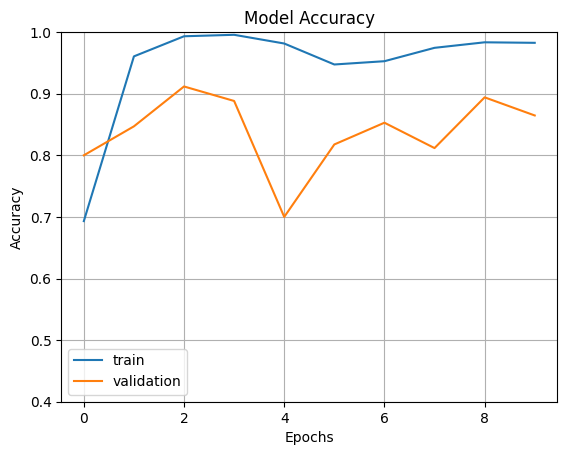

In [13]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

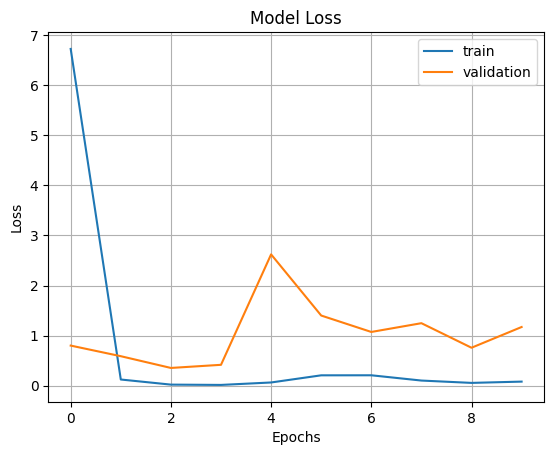

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

# Making Predictions

In [16]:
import cv2
image=cv2.imread("train/abdominal-machine/abdominal_JPG.rf.32e5bde5ca12fbd27a832ff69f2c348c.jpg")

image_resized= cv2.resize(image, (img_height,img_width))
image=np.expand_dims(image_resized,axis=0)
print(image.shape)


(1, 180, 180, 3)


In [17]:
pred=resnet_model.predict(image)
print(pred)

1/1 [==============================] - 1s 1s/step
[[9.9999905e-01 5.2230621e-13 2.4073289e-12 2.9195180e-10 9.8083581e-07
  4.8948015e-19 9.2940033e-22 2.7285955e-15 1.4938179e-16 3.1156175e-16
  1.2784896e-14 9.4860329e-21 1.6831526e-12 2.5660561e-12 1.2906199e-14
  1.2075253e-11 1.5042693e-11 9.5631666e-14 4.9389046e-16 5.4617688e-10
  2.0560190e-21 2.6022863e-13 2.4138070e-12]]


In [18]:
output_class=class_names[np.argmax(pred)]
print("The predicted class is", output_class)

The predicted class is abdominal-machine


In [19]:
# save as h5 file
resnet_model.save_weights('gym_equipment.h5')

In [20]:
# save as directory
resnet_model.save('gym_equipment')

INFO:tensorflow:Assets written to: gym_equipment/assets


INFO:tensorflow:Assets written to: gym_equipment/assets


In [23]:
# Convert the model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(resnet_model)
tflite_model = converter.convert()

# Save the TensorFlow Lite model to a file
with open("gym_equipment.tflite", "wb") as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpqltwzzm8/assets


INFO:tensorflow:Assets written to: /tmp/tmpqltwzzm8/assets
2023-11-22 05:02:33.456379: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:364] Ignored output_format.
2023-11-22 05:02:33.456414: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:367] Ignored drop_control_dependency.
2023-11-22 05:02:33.460540: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /tmp/tmpqltwzzm8
2023-11-22 05:02:33.508830: I tensorflow/cc/saved_model/reader.cc:91] Reading meta graph with tags { serve }
2023-11-22 05:02:33.508865: I tensorflow/cc/saved_model/reader.cc:132] Reading SavedModel debug info (if present) from: /tmp/tmpqltwzzm8
2023-11-22 05:02:33.613718: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:375] MLIR V1 optimization pass is not enabled
2023-11-22 05:02:33.652159: I tensorflow/cc/saved_model/loader.cc:231] Restoring SavedModel bundle.
2023-11-22 05:02:34.658979: I tensorflow/cc/saved_model/loader.cc:215] Running initializatio